In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import warnings

In [2]:
warnings.filterwarnings(action='ignore')
data = pd.read_csv('income.csv')
data

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000
5,Gautam,39,155000
6,David,41,160000
7,Andrea,38,162000
8,Brad,36,156000
9,Angelina,35,130000


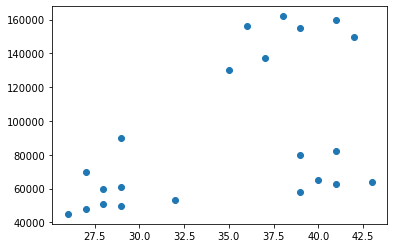

In [3]:
plt.scatter(data['Age'], data['Income($)'])
# plt.legend()
plt.show()

## Frist Prediction Attempt

In [4]:
km = KMeans(n_clusters=3)
y_predict= km.fit_predict(data[['Age', 'Income($)']])
y_predict

array([2, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0],
      dtype=int32)

In [5]:
# data['Cluster'] = y_predict

In [6]:
data

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000
5,Gautam,39,155000
6,David,41,160000
7,Andrea,38,162000
8,Brad,36,156000
9,Angelina,35,130000


## Preprocessing

In [7]:
from sklearn.preprocessing import MinMaxScaler

In [8]:
scaler = MinMaxScaler()
data['Age_scaled'] = scaler.fit_transform(data[['Age']])

scaler = MinMaxScaler()
data['Income($)_scaled'] = scaler.fit_transform(data[['Income($)']])
data

,Name,Age,Income($),Age_scaled,Income($)_scaled
0,Rob,27,70000,0.058824,0.213675
1,Michael,29,90000,0.176471,0.384615
2,Mohan,29,61000,0.176471,0.136752
3,Ismail,28,60000,0.117647,0.128205
4,Kory,42,150000,0.941176,0.897436
5,Gautam,39,155000,0.764706,0.940171
6,David,41,160000,0.882353,0.982906
7,Andrea,38,162000,0.705882,1.000000
8,Brad,36,156000,0.588235,0.948718
9,Angelina,35,130000,0.529412,0.726496


## Predicting

In [9]:
km = KMeans(n_clusters=3)
y_predict = km.fit_predict(data[['Age_scaled', 'Income($)_scaled']])


In [10]:
k_range = range(1,10)
sse = []
for k in k_range:
    km = KMeans(n_clusters=k, init='k-means++')
    km.fit_predict(data[['Age_scaled', 'Income($)_scaled']])
    sse.append(km.inertia_)

In [11]:
sse

[5.434011511988178,
 2.091136388699078,
 0.4750783498553096,
 0.34910470944195654,
 0.26217927623452136,
 0.22020960864009398,
 0.1685851223602976,
 0.1453169078583121,
 0.10188787724979426]

In [12]:
km.cluster_centers_

array([[0.08823529, 0.02884615],
       [0.68627451, 0.96296296],
       [0.86764706, 0.14957265],
       [0.11764706, 0.15954416],
       [0.58823529, 0.75641026],
       [0.91176471, 0.94017094],
       [0.82352941, 0.30769231],
       [0.35294118, 0.06837607],
       [0.17647059, 0.38461538]])

## Elbow Graph

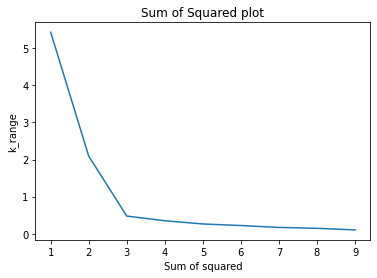

In [13]:
plt.plot(k_range, sse)
plt.title('Sum of Squared plot')
plt.ylabel('k_range')
plt.xlabel('Sum of squared')
plt.show()

In [14]:
km = KMeans(n_clusters=3)
y_predict = km.fit_predict(data[['Age_scaled', 'Income($)_scaled']])

In [15]:
data['Label'] = y_predict
data

,Name,Age,Income($),Age_scaled,Income($)_scaled,Label
0,Rob,27,70000,0.058824,0.213675,0
1,Michael,29,90000,0.176471,0.384615,0
2,Mohan,29,61000,0.176471,0.136752,0
3,Ismail,28,60000,0.117647,0.128205,0
4,Kory,42,150000,0.941176,0.897436,1
5,Gautam,39,155000,0.764706,0.940171,1
6,David,41,160000,0.882353,0.982906,1
7,Andrea,38,162000,0.705882,1.000000,1
8,Brad,36,156000,0.588235,0.948718,1
9,Angelina,35,130000,0.529412,0.726496,1


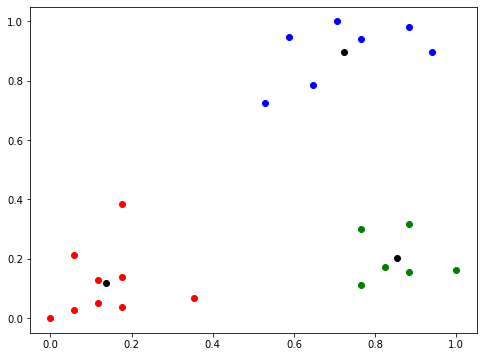

In [16]:
cl1 = data[data['Label'] == 0]
cl2 = data[data['Label'] == 1]
cl3 = data[data['Label'] == 2]

plt.figure(figsize=(8, 6))
plt.scatter(cl1['Age_scaled'], cl1['Income($)_scaled'], label='Cluster1', color='Red')
plt.scatter(cl2['Age_scaled'], cl2['Income($)_scaled'], label='Cluster2', color='Blue')
plt.scatter(cl3['Age_scaled'], cl3['Income($)_scaled'], label='Cluster3', color='Green')
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], label='Cluster1', color='black')

In [17]:
cl1

,Name,Age,Income($),Age_scaled,Income($)_scaled,Label
0,Rob,27,70000,0.058824,0.213675,0
1,Michael,29,90000,0.176471,0.384615,0
2,Mohan,29,61000,0.176471,0.136752,0
3,Ismail,28,60000,0.117647,0.128205,0
11,Tom,26,45000,0.000000,0.000000,0
12,Arnold,27,48000,0.058824,0.025641,0
13,Jared,28,51000,0.117647,0.051282,0
14,Stark,29,49500,0.176471,0.038462,0
15,Ranbir,32,53000,0.352941,0.068376,0
